# Logistic Regression  Model on Classification of Gender by Voice of healthy individuals 

In the previous percetron model, there is a significant overlapping area (60-80% overlap) between male and female cases. Even with cleaned-data, the variable 'mean frequency' has the middle range (150-250 Hz) shared by both female and male voices.  This leads to challenges in achieving a stable classification. 

We hope to improve the accuracy of classification with logistic regression since logistic Regression can handle cases where the decision boundary is not a straight line in the feature space more gracefully. Although it inherently models linear boundaries, the logistic function's output allows for overlap and soft classification margins. This is particularly effective when features like meanfreq in the dataset overlap significantly between classes.Moreover, the loss function in Logistic Regression (log-loss) is different from the Perceptron's (zero-one loss). Log-loss provides a smooth measure of confidence levels of predictions and penalizes wrong predictions with a degree proportional to their deviation from the actual class, making its updates generally more stable and consistent.

---
## The Model-Logistic Regression
Logistic Regression models the probability of the target belonging to a particular class. By using the sigmoid function (or sigmoid), the output values between 0 and 1 as it considers the likelihood of class memberships rather than making a hard decision boundary.


In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Set the Seaborn theme
sns.set_theme()

df = pd.read_csv('gender_voice.csv', delimiter=',')
df.dataframeName = 'gender voice.csv'


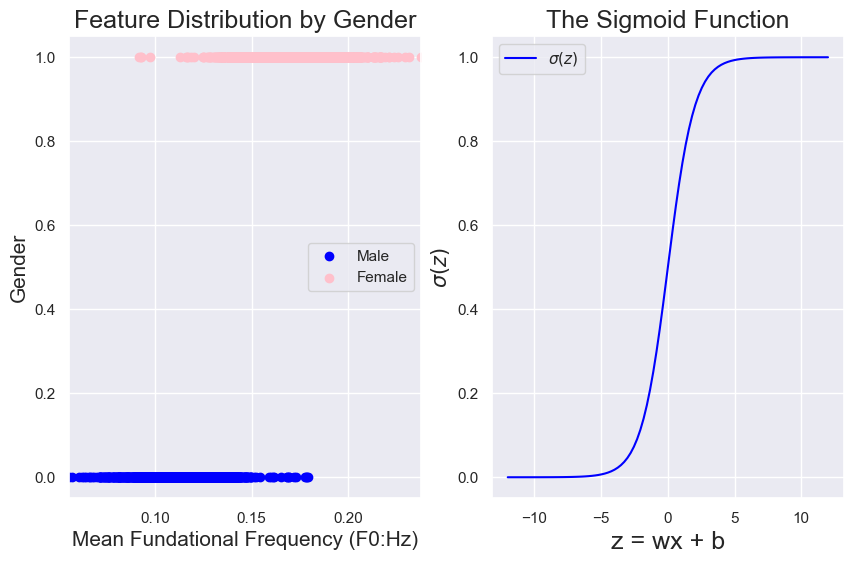

In [37]:
# Define the sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
# For ax1, plot some feature against binary labels
ax1.set_xlim(df['meanfun'].min(), df['meanfun'].max())
ax1.scatter(df[df['label'] == 'male']['meanfun'], 
            np.zeros(df[df['label'] == 'male'].shape[0]), 
            color="blue", 
            label="Male")
ax1.scatter(df[df['label'] == 'female']['meanfun'], 
            np.ones(df[df['label'] == 'female'].shape[0]), 
            color="pink", 
            label="Female")
ax1.set_xlabel("Mean Fundational Frequency (F0:Hz)", fontsize=15)
ax1.set_ylabel("Gender", fontsize=15)
ax1.set_title("Feature Distribution by Gender", fontsize=18)
ax1.legend()

# For ax2, plot the sigmoid function
domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
         sigmoid(domain), 
         color="blue", 
         label="$\sigma(z)$")
ax2.set_xlabel("z = wx + b", fontsize=18)
ax2.set_ylabel("$\sigma(z)$", fontsize=15)
ax2.set_title("The Sigmoid Function", fontsize=18)
plt.legend()

plt.show()

In [38]:
X = df[["meanfreq", "meanfun"]].iloc[:3168].values
# Store the gender label in the numpy array y
y = df['label'].values

# Convert each entry of y: 'male' to 0 and 'female' to 1
y = np.where(y == 'male', 0, 1)

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

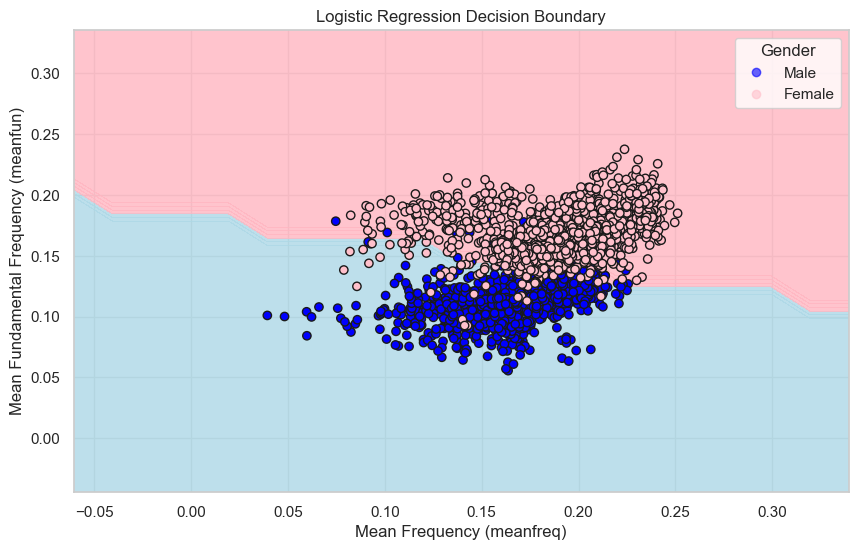

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Generate a grid of points with distance 0.02 between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# Predict the function value for the whole grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define a custom color map for the contour plot
cmap_light = mcolors.ListedColormap(['#add8e6', '#ffb6c1'])  # Light blue and light pink

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=mcolors.ListedColormap(['blue', 'pink']))

plt.xlabel('Mean Frequency (meanfreq)')
plt.ylabel('Mean Fundamental Frequency (meanfun)')
plt.title('Logistic Regression Decision Boundary')

# Create a legend for the scatter plot
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = ['Male', 'Female']  # Adjust labels as needed
plt.legend(handles, legend_labels, title="Gender")

plt.show()


## Logistic Model Summary 

Conclusion:
In cases where features do not provide clear boundaries or have significant overlap, as with your features meanfun and meanfreq, Logistic Regression tends to perform better due to its probabilistic nature, ability to incorporate regularization, and use of a more flexible loss function. These properties make it a robust choice for more complex and subtly varying datasets.
For the graph, the logistc regression line demonstrate more flexbilibitliy towards overlapping areas between male and female voices. The over accurcay of this classification tasks has improved. 